# FuelProphet model

Need this code for installing packages in kivy garden
chmod a+x .venv/bin/garden
python -m pip install https://github.com/kivy-garden/matplotlib/archive/master.zip

In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timedelta

from sklearn.metrics import mean_squared_error,mean_absolute_error

import sys
import os
# Get the parent directory and add it to sys.path
parent_dir = os.path.abspath("..")
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from functions_nico.nico_fuelprophet import FuelProphet
from functions_nico.nico_preprocessing import load_data, merge_oil, merge_ex_rate, get_oil_euro
from functions_nico.nico_models import baseline_model, print_model, split_data,prophet_model

/Users/nicoschreiber/Desktop/Neue_Fische/Python/FuelProphet/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
# Load data
df = pd.read_parquet("../data/appdata/dailydata/alldata_2025-06-18.parquet")

#df = df[df["station_uuid"] == "fb0f8030-c1eb-4df1-9410-054eea7422ad"]
df = df[(df["e5"]>1.0) & (df["e5"]< 2.5)]

#df_resample = df.set_index('datetime')
#df_resample = df_resample.groupby(["station_uuid","name","street","house_number","brand","openingtimes_json"])["e5"].resample("5min").ffill().reset_index()


In [26]:
import json
# Parse the JSON string from the first row
opening_times = json.loads(df_resample["openingtimes_json"].iloc[0])
opening_times

{'openingTimes': [{'applicable_days': 64,
   'periods': [{'startp': '07:00', 'endp': '22:00'}]},
  {'applicable_days': 32, 'periods': [{'startp': '06:00', 'endp': '22:00'}]},
  {'applicable_days': 31, 'periods': [{'startp': '05:00', 'endp': '22:00'}]}]}

In [3]:
# Setup model
model = FuelProphet()
model.fit_pacf(df_resample,threshold=0.2,lags=288*3)
model.normalize()
pred = model.predict(X=df,num_predictions=288*3)
print(model.b)
print(model.features)

[0.01918997 0.01332331 0.00093219 0.26828396 0.69827057]
[  -1  -24  -90 -288 -576]


In [5]:
now = datetime.today()
rounded = now - timedelta(minutes=now.minute % 5,
                          seconds=now.second,
                          microseconds=now.microsecond)

/Users/nicoschreiber/Desktop/Neue_Fische/Python/FuelProphet/functions_nico/nico_models.py:223: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)


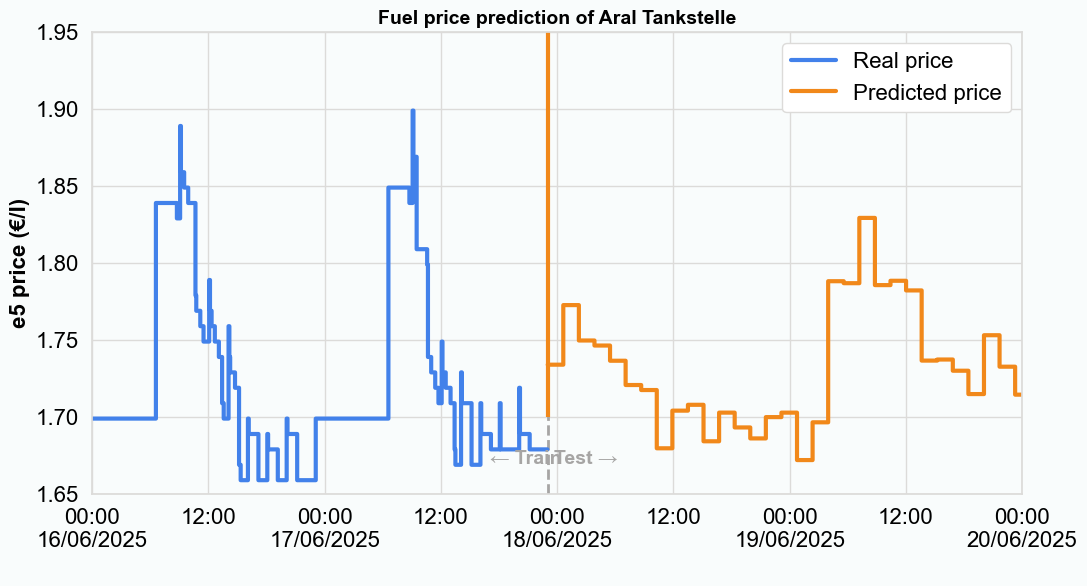

In [4]:
# Print model results
params = {"background":"#f9fcfc",
          "gridcolor": "#dcdbd9",
          "legendedge": "#dcdbd9",
          "legendface": "white",
          "legendcol": "black",
          "textcolor": "black"
          }

print_model(df_resample,pred,xlim=("2025-06-16","2025-06-20"),ylim=(1.65,1.95),metrics=False,params=params)